# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [4]:
df_alcohol = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')

In [65]:
df_alcohol.fillna(value='NA', inplace=True)

In [66]:
df_alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. Which continent drinks more beer on average?

In [67]:
df_alcohol.beer_servings.groupby(df_alcohol.continent).mean().sort_values(ascending=False).head(1)

continent
EU    193.777778
Name: beer_servings, dtype: float64

### Step 5. For each continent print the statistics for wine consumption.

In [68]:
df_alcohol.wine_servings.groupby(df_alcohol.continent).describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
NA,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [69]:
df_alcohol.groupby(df_alcohol.continent).mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [70]:
df_alcohol.groupby(df_alcohol.continent).median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [71]:
data_mean = df_alcohol.spirit_servings.mean()

In [72]:
data_max = df_alcohol.spirit_servings.max()

In [73]:
data_min = df_alcohol.spirit_servings.min()

In [74]:
data = {'max': data_max, 'min': data_min, 'mean': data_mean}

In [75]:
data

{'max': 438, 'min': 0, 'mean': 80.99481865284974}

In [76]:
pd.DataFrame(data, index=[0])

,max,min,mean
0,438,0,80.994819


In [77]:
df_cont = df_alcohol.groupby(df_alcohol.continent)

In [78]:
df_eu = df_cont.get_group('EU')

In [79]:
df_af = df_cont.get_group('AF')

AF
AS
EU
NA
OC
SA


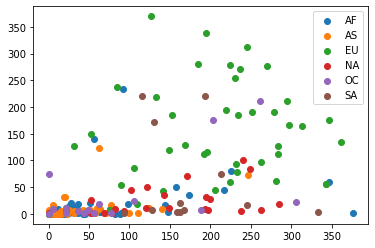

In [80]:
for i in df_cont.groups:
    print(i)
    df_c = df_cont.get_group(i)
    plt.scatter(x=df_c.beer_servings, y=df_c.wine_servings, label=i)
plt.legend()

In [81]:
import matplotlib.pyplot as plt

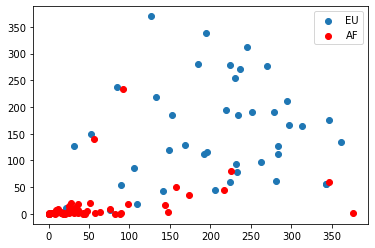

In [82]:
plt.scatter(x=df_eu.beer_servings, y=df_eu.wine_servings, label='EU')
plt.scatter(x=df_af.beer_servings, y=df_af.wine_servings, color='red', label='AF')
plt.legend()